<h1>
<center><img src="lite_no_back.png" width = 80 height= 80/>
<b>Nefarious </h1></b> </center>

---

# Solving CartPole with Q-Learning ( Quantized States )
---

In [42]:
import gym
from gym import wrappers
import numpy as np 
import matplotlib.pyplot as plt

from IPython.display import HTML

In [194]:
HTML('<iframe width="697" height="292" src="https://www.youtube.com/embed/0qLEcGCJ-Lc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Important Point <br>
* The outcome of the observation are 4 Variables, Their corresponding Meaning are:
<ol>
    <li>Cart Position **&plusmn;4.8**</li>
    <li>Cart Velocity  **inf** </li>
    <li>Pole Angle  **&plusmn;0.418**</li>
    <li>Pole Velocity  **inf**</li>
</ol>




In [178]:
class Q_learning:
    def __init__(self,env, predef, Q):
        '''
        Predef = True  
        If the `Q` Table is already provided
        else False
        '''
        
        if predef == True:
            self.Q = Q
        else:
            self.Q = np.random.uniform(low=-0.5, high=0.5, size= (6,10,20,10,2))
            
            
        self.states = [np.linspace(-1, 1, 5),  np.linspace(-2.0, 2.0, 9),
                       np.linspace(-0.4, 0.4, 19),  np.linspace(-2.0, 2.0, 9)]
        
        # use to divide the continuous problem to States
        
        self.env = env # environment of the game
   
    def obs_bin(self,a,b):
        return np.digitize(x = a,bins = b)  # classify the continuous current variable to one of the states
    
    def obs_state(self, obs):
        l_state = []
        for i in range(4):
            l_state.append(self.obs_bin(obs[i],self.states[i]))
        return l_state   # returns the state values of the current observation variables
    
    def predict(self,b):
        a = self.obs_state(b)
        return self.Q[a[0],a[1],a[2],a[3]]  # return the values from Q table 
        
    def update(self, a, action, G):
        ''' 
        Gradient Descent is used to Perform the Weight updation.
        '''
        a = self.obs_state(a)
        self.Q[a[0],a[1],a[2],a[3],action ]  += 1e-1*( G - self.Q[a[0],a[1],a[2],a[3] ,action ])

    def vid_play(self,env1):
        '''
        Run the Demo on the Current Learned `Q` Values.
        '''
        done = False
        tot_reward = 0
        env1 = wrappers.Monitor(env1,'q_vid',force = True)
        observation = env1.reset()
        while not done:
            action = self.sample_action(observation , 0)
            env1.render()
            observation, reward, done, info = env1.step(action)
            tot_reward += reward
        print(tot_reward)
        env1.close()
        
    def sample_action(self, s, eps):
        '''
        This function allows to randomly explore states, according to Epsilon value
        '''
        if np.random.random() < eps:
            return self.env.action_space.sample()
        else:
            p = self.predict(s)
            return np.argmax(p)


In [179]:

def run(env,eps, model):

    tot_reward = 0
    observation = env.reset()
    done = False
    gamma = 0.8
    i = 0
    while not done and i < 10000:
        action = model.sample_action(observation, eps)
        
        prev_obs = observation
        observation, reward, done, info = env.step(action)
        tot_reward += reward
        angle = observation[2]
        
        G = reward + gamma*np.max(model.predict(observation))
        # TD(0) 
        if done and i < 200:
            G = -300
        
        model.update(model.obs_state(prev_obs), action, G)
        i+=1

        tot_reward += reward
        if done:
            break
    env.close()
    return tot_reward


In [184]:
_Q = np.load("Q.npy")
env = gym.make('CartPole-v0')
model = Q_learning(env,True,_Q)

In [195]:
def loop():
    
    n_episodes = 10000
    lreward = []
    for j in range(n_episodes):
        eps = 1/np.sqrt(j+1)
        lreward.append(run(env, eps,model))
        if j % 100 == 0:
            print("episode:", j, "total reward:", lreward[-1], "eps:", eps)
    np.save("Q",model.Q)
    return lreward 

l = loop()


episode: 0 total reward: 40.0 eps: 1.0
episode: 100 total reward: 232.0 eps: 0.09950371902099892
episode: 200 total reward: 50.0 eps: 0.07053456158585983
episode: 300 total reward: 26.0 eps: 0.0576390417704235
episode: 400 total reward: 40.0 eps: 0.04993761694389223
episode: 500 total reward: 50.0 eps: 0.04467670516087703
episode: 600 total reward: 36.0 eps: 0.04079085082240021
episode: 700 total reward: 72.0 eps: 0.0377694787300249
episode: 800 total reward: 62.0 eps: 0.03533326266687867
episode: 900 total reward: 24.0 eps: 0.03331483023263848
episode: 1000 total reward: 200.0 eps: 0.0316069770620507
episode: 1100 total reward: 198.0 eps: 0.03013743873394561
episode: 1200 total reward: 240.0 eps: 0.028855492841238062
episode: 1300 total reward: 96.0 eps: 0.027724348650071385
episode: 1400 total reward: 22.0 eps: 0.02671658425726324
episode: 1500 total reward: 50.0 eps: 0.025811286645983367
episode: 1600 total reward: 340.0 eps: 0.02499219116020307
episode: 1700 total reward: 280.0 eps

In [196]:
model.vid_play(env)

35.0


In [197]:
def plot_running_avg(totalrewards):
    N = len(totalrewards)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

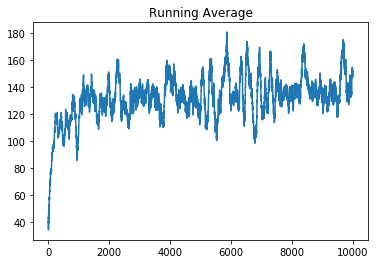

In [198]:
plot_running_avg(np.array(l))

## END

In [415]:
q.obs_state(observation)

lreward = []
env.reset()
low = -0.025
upper = 0.025
for i in range(steps):
    env.render()
    observation, reward, done, info = env.step(np.random.randint(0,2))
    if observation[2] < low:
        move = 1
        upper -= 0.01
        low -= 0.01
    elif observation[2] >= upper:
        move = 0
        low += 0.01
        upper += 0.01
    else:
        move = np.random.randint(0,2)
        
    if done:
        break
    lreward.append(observation)
env.close()
plt.plot(np.matrix(lreward)[:,2])